# Activity 7.01: Implementing Matplotlib and Seaborn on the New York City Database

In this activity, we will visualize data pertaining to New York City (NYC) and compare it to the state of New York and the United States (US), including visualizing the median household income, plotting the average wage by gender and for different job categories, visualizing the wage distribution, and much more. The goal of this activity is to combine everything you've learned about Matplotlib and Seaborn to create self-explanatory, nice-looking plots.

The American Community Survey (ACS) Public-Use Microdata Samples (PUMS) dataset (one-year estimate from 2017) is used.

Download the following datasets and place the extracted CSV file in the Datasets subdirectory: csv_pny.zip and csv_hny.zip.

In this activity, the New York Population Records (../../Datasets/acs2017/pny.csv) and New York Housing Unit Records (../../Datasets/acs2017/hny.csv) datasets are used. The first dataset contains information about the New York population, and the second dataset contains information about housing units. The dataset contains data for about 1% of the population and housing units. Due to the extensive amount of data, we do not provide the datasets for the whole of the US; instead, we will provide the required information related to the US, if necessary. The PUMS_Data_Dictionary_2017.pdf PDF gives an overview and description of all variables. A further description of the codes can be found in ACSPUMS2017CodeLists.xls:

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import squarify

## Read datasets

In [5]:
df_pny = pd.read_csv('../../Datasets/pny.csv')
df_pny

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2017000000050,2,1,902,1,36,1011189,122,72,...,34,117,128,113,215,136,222,119,116,194
1,P,2017000000050,2,2,902,1,36,1011189,118,72,...,30,125,129,105,182,113,194,105,125,204
2,P,2017000000068,2,1,4002,1,36,1011189,56,31,...,50,60,16,15,17,63,97,54,17,61
3,P,2017000000068,2,2,4002,1,36,1011189,58,28,...,56,58,16,15,19,59,97,60,15,58
4,P,2017000000085,2,1,3803,1,36,1011189,111,54,...,35,29,39,128,211,38,101,114,99,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196580,P,2017001536700,2,1,3808,1,36,1011189,198,61,...,384,369,195,195,16,189,198,190,207,220
196581,P,2017001536755,2,1,2001,1,36,1011189,11,20,...,2,20,20,11,11,2,2,20,11,1
196582,P,2017001536766,2,1,3710,1,36,1011189,116,25,...,10,116,9,114,222,117,225,9,118,227
196583,P,2017001536810,2,1,1801,1,36,1011189,24,20,...,23,23,42,43,43,42,23,43,23,42


In [6]:
df_hny = pd.read_csv('../../Datasets/hny.csv')
df_hny

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
0,H,2017000000046,2,4008,1,36,1000000,1011189,347,0,...,387,619,594,551,349,104,357,578,344,590
1,H,2017000000050,2,902,1,36,1000000,1011189,122,2,...,34,116,128,113,215,137,221,118,116,195
2,H,2017000000068,2,4002,1,36,1000000,1011189,56,2,...,50,61,17,15,17,62,97,54,17,61
3,H,2017000000085,2,3803,1,36,1000000,1011189,111,2,...,35,29,40,128,211,37,102,114,99,137
4,H,2017000000092,2,3701,1,36,1000000,1011189,204,0,...,398,328,187,214,66,59,353,216,218,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93899,H,2017001536700,2,3808,1,36,1000000,1011189,0,1,...,0,0,0,0,0,0,0,0,0,0
93900,H,2017001536755,2,2001,1,36,1000000,1011189,0,1,...,0,0,0,0,0,0,0,0,0,0
93901,H,2017001536766,2,3710,1,36,1000000,1011189,0,1,...,0,0,0,0,0,0,0,0,0,0
93902,H,2017001536810,2,1801,1,36,1000000,1011189,0,1,...,0,0,0,0,0,0,0,0,0,0


## Data wrangling

Use the given PUMA (public use microdata area code based on the 2010 census definition, which are areas with populations of 100k or more) ranges to further divide the dataset into NYC districts (Bronx, Manhattan, Staten Island, Brooklyn, and Queens):

In [7]:
# PUMA ranges
bronx = [3701, 3710]
manhatten = [3801, 3810]
staten_island = [3901, 3903]
brooklyn = [4001, 4018]
queens = [4101, 4114]
nyc = [bronx[0], queens[1]]

In [8]:
def puma_subset(df, puma_range):
    return df.loc[(df['PUMA'] >= puma_range[0]) & (df['PUMA'] <= puma_range[1])]

In [9]:
df_h_bronx = puma_subset(df_hny, bronx)
df_h_manhatten = puma_subset(df_hny, manhatten)
df_h_staten_island = puma_subset(df_hny, staten_island)
df_h_brooklyn = puma_subset(df_hny, brooklyn)
df_h_queens = puma_subset(df_hny, queens)
df_h_nyc = puma_subset(df_hny, nyc)

df_p_nyc = puma_subset(df_pny, nyc)

In the dataset, each sample has a certain weight that reflects the weight for the total dataset. Therefore, we cannot simply calculate the median. Use the given weighted_median function in the following code to compute the median:

In [10]:
# Function for a 'weighted' median
def weighted_frequency(values, weights):
    weighted_values = []
    for value, weight in zip(values, weights):
        weighted_values.extend(np.repeat(value, weight))
    return weighted_values

def weighted_median(values, weights):
    return np.median(weighted_frequency(values, weights))

In this subtask, we will create a plot containing multiple subplots that visualize information with regard to NYC wages. Before we create the plots, some data wrangling is necessary.

### Compute the average wage by gender for the given occupation categories for the population of NYC:

In [11]:
income_adjustement = df_hny.loc[0, ['ADJINC']].values[0] / 1e6
def median_household_income(df):
    query = df.loc[np.isfinite(df['HINCP']), ['HINCP', 'WGTP']].values
    return np.round(weighted_median(query[:, 0], query[:, 1]) * income_adjustement)

In [12]:
h_bronx_income_median = median_household_income(df_h_bronx)
h_manhatten_income_median = median_household_income(df_h_manhatten)
h_staten_island_income_median = median_household_income(df_h_staten_island)
h_brooklyn_income_median = median_household_income(df_h_brooklyn)
h_queens_income_median = median_household_income(df_h_queens)
h_nyc_income_median = median_household_income(df_h_nyc)
h_ny_income_median = median_household_income(df_hny)

In [13]:
occ_categories = [
    'Management,\nBusiness,\nScience,\nand Arts\nOccupations', 
    'Service\nOccupations',
    'Sales and\nOffice\nOccupations', 
    'Natural Resources,\nConstruction,\nand Maintenance\nOccupations',
    'Production,\nTransportation,\nand Material Moving\nOccupations'
]
occ_ranges = {
    'Management, Business, Science, and Arts Occupations': [10, 3540], 
    'Service Occupations': [3600, 4650],
    'Sales and Office Occupations': [4700, 5940], 
    'Natural Resources, Construction, and Maintenance Occupations': [6000, 7630],
    'Production, Transportation, and Material Moving Occupations': [7700, 9750]
}

In [14]:
def wage_by_gender_and_occupation(df, gender):
    weighted_wages = []
    for occ in occ_ranges.values():
        query = df.loc[
            (df['OCCP'] >= occ[0]) & (df['OCCP'] <= occ[1]) & (df['SEX'] == gender), 
            ['WAGP', 'PWGTP']
        ]
        weight_sum = np.sum(query['PWGTP'])
        weighted_wages.append(np.round(np.sum(query['WAGP'] * (query['PWGTP'] / weight_sum))))
    return weighted_wages

In [15]:
wages_male = wage_by_gender_and_occupation(df_p_nyc, 1)
wages_male

[92300.0, 29750.0, 49023.0, 40145.0, 30135.0]

In [16]:
wages_female = wage_by_gender_and_occupation(df_p_nyc, 2)
wages_female

[66908.0, 18975.0, 34971.0, 41466.0, 27753.0]

In [17]:
male_wages_by_occupation = pd.DataFrame({
    'occupation': occ_categories,
    'gender': 'male',
    'wages': wages_male
})
female_wages_by_occupation = pd.DataFrame({
    'occupation': occ_categories,
    'gender': 'female',
    'wages': wages_female
})
wages_by_gender_and_occupation = pd.concat([male_wages_by_occupation, female_wages_by_occupation], axis=0)
wages_by_gender_and_occupation

,occupation,gender,wages
0,"Management,\nBusiness,\nScience,\nand Arts\nOc...",male,92300.0
1,Service\nOccupations,male,29750.0
2,Sales and\nOffice\nOccupations,male,49023.0
3,"Natural Resources,\nConstruction,\nand Mainten...",male,40145.0
4,"Production,\nTransportation,\nand Material Mov...",male,30135.0
0,"Management,\nBusiness,\nScience,\nand Arts\nOc...",female,66908.0
1,Service\nOccupations,female,18975.0
2,Sales and\nOffice\nOccupations,female,34971.0
3,"Natural Resources,\nConstruction,\nand Mainten...",female,41466.0
4,"Production,\nTransportation,\nand Material Mov...",female,27753.0


### Compute the wage frequencies for New York and NYC. Use the following yearly wage intervals: 10k steps between 0 and 100k, 50k steps between 100k and 200k, and >200k:

In [18]:
wage_bins = {
    '<$10k': [0, 10000], 
    '$10-20k': [10000, 20000], 
    '$20-30k': [20000, 30000], 
    '$30-40k': [30000, 40000], 
    '$10-20k': [40000, 50000],
    '$50-60k': [50000, 60000], 
    '$60-70k': [60000, 70000], 
    '$70-80k': [70000, 80000], 
    '$80-90k': [80000, 90000], 
    '$90-100k': [90000, 100000],
    '$100-150k': [100000, 150000], 
    '$150-200k': [150000, 200000], 
    '>$200k': [200000, np.infty]
}

In [19]:
def wage_frequency(df):
    # Only consider people who have a job: salary > 0
    valid = df.loc[np.isfinite(df['WAGP']) & (df['WAGP'] > 0), ['WAGP', 'PWGTP']] 
    overall_sum = np.sum(valid['PWGTP'].values)
    frequency = []
    for wage_bin in wage_bins.values():
        query = df.loc[
            (df['WAGP'] * income_adjustement > wage_bin[0]) & (df['WAGP'] * income_adjustement <= wage_bin[1]), 
            ['PWGTP']
        ].values
        frequency.append(np.sum(query) / overall_sum)
    return frequency

In [20]:
wages_nyc = wage_frequency(df_p_nyc)
wages_nyc

[0.12319665687313829,
 0.08791795295936233,
 0.13109764247951414,
 0.11138740758387686,
 0.08226138003818838,
 0.06349911200558513,
 0.04930137420891373,
 0.040195971507527545,
 0.02935456160850128,
 0.07887287757269382,
 0.02807420307025814,
 0.04012641766232365]

In [21]:
wages_ny = wage_frequency(df_pny)
wages_ny

[0.14425873017453159,
 0.09123549110408637,
 0.12671778660848176,
 0.11110125676141624,
 0.08145193183967536,
 0.0653776775047419,
 0.04999735038658715,
 0.03890969866102515,
 0.027813700904599135,
 0.07749430433670824,
 0.024525465298762265,
 0.033427060265482214]

In [22]:
wage_frequency_ny = pd.DataFrame({
    'bins': wage_bins.keys(),
    'area': 'New York',
    'perc': 100*np.array(wages_ny)
})
wage_frequency_nyc = pd.DataFrame({
    'bins': wage_bins.keys(),
    'area': 'NYC',
    'perc': 100*np.array(wages_nyc)
})
wages_histogram = pd.concat([wage_frequency_ny, wage_frequency_nyc], axis=0)
wages_histogram

,bins,area,perc
0,<$10k,New York,14.425873
1,$10-20k,New York,9.123549
2,$20-30k,New York,12.671779
3,$30-40k,New York,11.110126
4,$50-60k,New York,8.145193
5,$60-70k,New York,6.537768
6,$70-80k,New York,4.999735
7,$80-90k,New York,3.890970
8,$90-100k,New York,2.781370
9,$100-150k,New York,7.749430


## Visualize

Create a plot containing multiple subplots that visualize information with regard to NYC wages. Now, visualize the median household income for the US, New York, NYC, and its districts. Next, visualize the average wage by gender for the given occupation categories for the population of NYC. Then, visualize the wage distribution for New York and NYC. Lastly, use the following yearly wage intervals: 10k steps between 0 and 100k, 50k steps between 100k and 200k, and >200k. Following is the expected output:

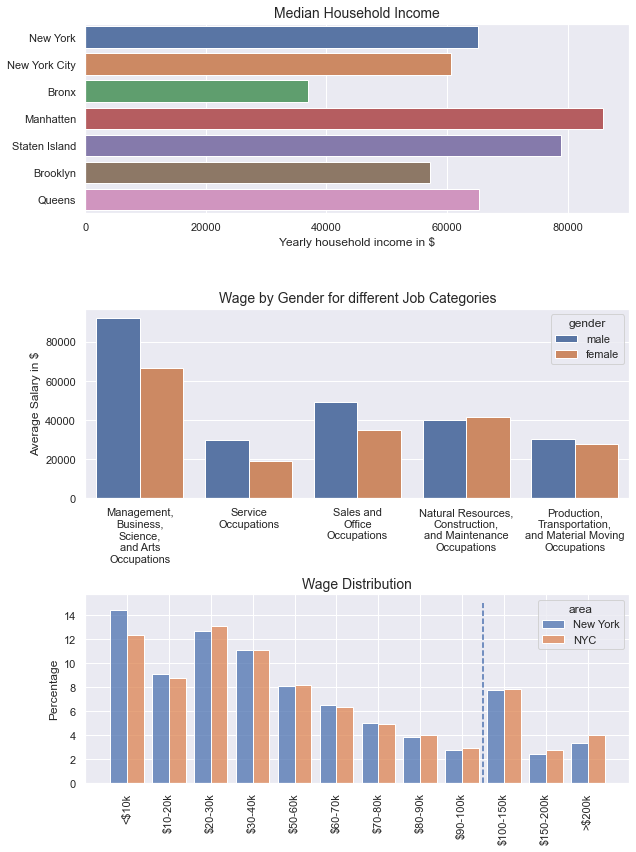

In [23]:
# switch to the Seaborn defaults
sns.set()
# switch to a darkgrid Seaborn style
sns.set_style("darkgrid")
# subplots
fig, axes = plt.subplots(3, 1, sharex=False, sharey=False, figsize=(9, 12))

# Median Household Income
axes[0].set_title('Median Household Income', fontsize=14)
sns.barplot(
    x=[
        h_ny_income_median,
        h_nyc_income_median, 
        h_bronx_income_median, 
        h_manhatten_income_median, 
        h_staten_island_income_median, 
        h_brooklyn_income_median,
        h_queens_income_median, 
    ], 
    y=[
        'New York',
        'New York City',
        'Bronx',
        'Manhatten',
        'Staten Island',
        'Brooklyn',
        'Queens',
    ],
    orient='h',
    ax=axes[0],
)
axes[0].set_xlabel('Yearly household income in $')

# Wage by Gender for different Job Categories
axes[1].set_title('Wage by Gender for different Job Categories', fontsize=14)
sns.barplot(
    x='occupation', 
    y='wages',
    hue='gender',
    data=wages_by_gender_and_occupation,
    ax=axes[1],
)
axes[1].set_xlabel('')
axes[1].set_ylabel('Average Salary in $')

# Wage Distribution
axes[2].set_title('Wage Distribution', fontsize=14)
sns.histplot(
    x='bins', 
    weights='perc',
    hue='area',
    data=wages_histogram,
    multiple="dodge",
    shrink=.8,
    ax=axes[2],
)
axes[2].set_xlabel('')
axes[2].set_ylabel('Percentage')
axes[2].tick_params(axis='x', labelrotation=90)
axes[2].vlines(x=8.5, ymin=0, ymax=15, linestyle='--')

plt.tight_layout()
plt.show()

### Use a tree map to visualize the percentage for the given occupation subcategories for the population of NYC:

In [24]:
occ_subcategories = {'Management,\nBusiness,\nand Financial': [10, 950],
                    'Computer, Engineering,\nand Science': [1000, 1965],
                    'Education,\nLegal,\nCommunity Service,\nArts,\nand Media': [2000, 2960],
                    'Healthcare\nPractitioners\nand\nTechnical': [3000, 3540],
                    'Service': [3600, 4650],
                    'Sales\nand Related': [4700, 4965],
                    'Office\nand Administrative\nSupport': [5000, 5940],
                    '': [6000, 6130],
                    'Construction\nand Extraction': [6200, 6940],
                    'Installation,\nMaintenance,\nand Repair': [7000, 7630],
                    'Production': [7700, 8965],
                    'Transportation\nand Material\nMoving': [9000, 9750]}

In [25]:
def count_people_per_occupation(df):
    counts = []
    for occ in occ_subcategories.values():
        query = df.loc[
            (df['OCCP'] >= occ[0]) & (df['OCCP'] <= occ[1]), 
            ['WAGP', 'PWGTP']
        ]
        counts.append(query.size)
    return counts

In [26]:
sizes = count_people_per_occupation(df_p_nyc)
sizes

[12758, 3922, 13202, 4448, 18154, 7732, 10716, 80, 3222, 1484, 2132, 4610]

In [47]:
labels = [f'{x[0]}\n{x[1]/sum(sizes):.1%}' for x in zip( occ_subcategories.keys(), sizes)]
labels

['Management,\nBusiness,\nand Financial\n15.5%',
 'Computer, Engineering,\nand Science\n4.8%',
 'Education,\nLegal,\nCommunity Service,\nArts,\nand Media\n16.0%',
 'Healthcare\nPractitioners\nand\nTechnical\n5.4%',
 'Service\n22.0%',
 'Sales\nand Related\n9.4%',
 'Office\nand Administrative\nSupport\n13.0%',
 '\n0.1%',
 'Construction\nand Extraction\n3.9%',
 'Installation,\nMaintenance,\nand Repair\n1.8%',
 'Production\n2.6%',
 'Transportation\nand Material\nMoving\n5.6%']

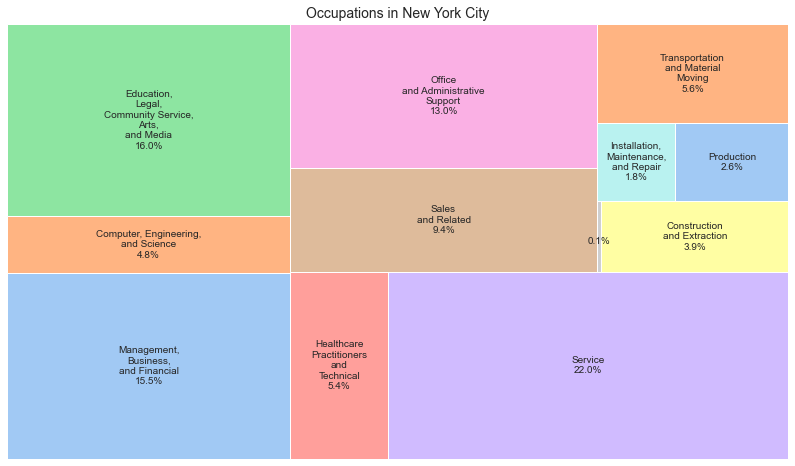

In [48]:
colors = sns.color_palette("pastel", as_cmap=True)
plt.figure(figsize=(14, 8))
squarify.plot(
    sizes=sizes, 
    label=labels, 
    color=colors,
    text_kwargs={'fontsize': 10, 'rotation': 0}
)
plt.axis("off")
plt.title('Occupations in New York City', fontsize=14)
plt.show()

### Use a heatmap to show the correlation between difficulties

(self-care difficulty, hearing difficulty, vision difficulty, independent living difficulty, ambulatory difficulty, veteran service-connected disability, and cognitive difficulty) and age groups (<5, 5-11, 12-14, 15-17, 18-24, 25-34, 35-44, 45-54, 55-64, 65-74, and 75+) in NYC. 

In [49]:
difficulties = {
    'Self-care difficulty': 'DDRS', 
    'Hearing difficulty': 'DEAR',
    'Vision difficulty': 'DEYE', 
    'Independent living difficulty': 'DOUT',
    'Ambulatory difficulty': 'DPHY',
    'Veteran service connected disability': 'DRATX',
    'Cognitive difficulty': 'DREM'
}
age_groups = {
    '<5': [0, 4], 
    '5-11': [5, 11], 
    '12-14': [12, 14], 
    '15-17': [15, 17], 
    '18-24': [18, 24], 
    '25-34': [25, 34], 
    '35-44': [35, 44], 
    '45-54': [45, 54], 
    '55-64': [55, 64], 
    '65-74': [65, 74], 
    '75+': [75, np.infty]
}

In [66]:
def get_difficulty_age_table(df):
    arr = np.zeros((len(difficulties), len(age_groups)))
    for d, diff in enumerate(difficulties.values()):
        for a, age in enumerate(age_groups.values()):
            query_age_sum = df.loc[
                (df['AGEP'] >= age[0]) & (df['AGEP'] <= age[1]),
                ['PWGTP']
            ]
            age_sum = np.sum(query_age_sum.values)
            query_diff_sum = df.loc[
                (df['AGEP'] >= age[0]) & (df['AGEP'] <= age[1]) & (df[diff] == 1),
                ['PWGTP']
            ]
            diff_sum = np.sum(query_diff_sum.values)
            arr[d, a] = diff_sum / age_sum * 100
    return arr

In [68]:
difficulty_age_table = get_difficulty_age_table(df_p_nyc)
difficulty_age_table

array([[ 0.        ,  1.24583553,  0.90360041,  0.61998422,  0.73356485,
         0.50344872,  1.12226613,  2.06176618,  4.15655216,  6.73569926,
        23.26173671],
       [ 0.57664479,  0.50309778,  0.48445614,  0.35199104,  0.57380956,
         0.4022803 ,  0.73091092,  1.03038056,  2.23535133,  5.14330146,
        15.63287761],
       [ 0.47798902,  1.25810977,  1.01376932,  1.38941918,  1.25434089,
         0.9053409 ,  1.52102126,  2.64050436,  3.45436265,  4.52169247,
        10.43625256],
       [ 0.        ,  0.        ,  0.        ,  1.59486849,  1.58655332,
         1.42010962,  2.08080888,  3.47763717,  6.62699427, 10.66992606,
        34.94376316],
       [ 0.        ,  0.81156117,  0.42811568,  0.5701673 ,  0.71929163,
         0.90741085,  2.61578993,  5.80757458, 12.4666731 , 18.21789167,
        40.75762182],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.08275848,
         0.13105321,  0.22073644,  0.28863813,  0.31733277,  0.93965817,
         0.988

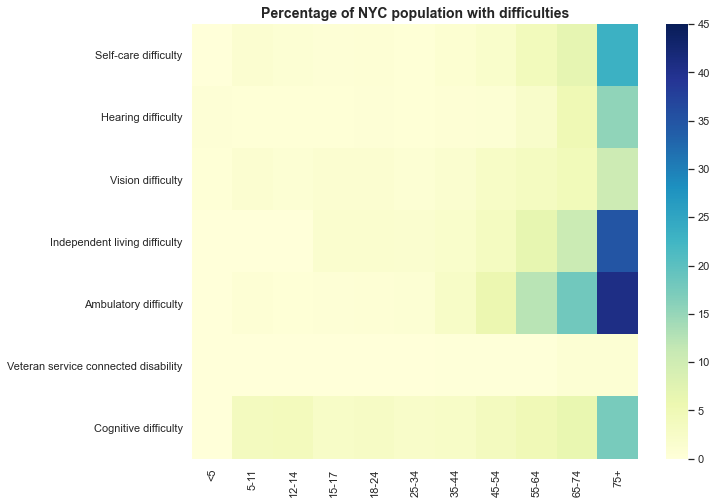

In [77]:
plt.figure(figsize = (10,8))
ax = sns.heatmap(
    difficulty_age_table, 
    square=False, 
    annot=False, 
    cmap="YlGnBu", 
    vmin=0, 
    vmax=45,
)
ax.set_yticklabels(difficulties.keys(), rotation=0)
ax.set_xticklabels(age_groups.keys(), rotation=90)
plt.title("Percentage of NYC population with difficulties", fontsize = 14, fontweight = 'bold')
plt.show()